### Ishaan Mehta E18CSE069 EB02 Part 1 Task 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#subtask 1 -Read
data = pd.read_csv("simple_linear_data.csv")
data

,G2,G3
0,30,30
1,25,30
2,40,50
3,70,75
4,50,50
...,...,...
390,45,45
391,80,80
392,40,35
393,60,50


In [5]:
#subtask2 - Add column
data.insert(0,'E', [1]*data.shape[0], True)
data

,E,G2,G3
0,1,30,30
1,1,25,30
2,1,40,50
3,1,70,75
4,1,50,50
...,...,...,...
390,1,45,45
391,1,80,80
392,1,40,35
393,1,60,50


In [6]:
#subtask3 - Print rows 40-55
data[40:56]

,E,G2,G3
40,1,50,55
41,1,60,60
42,1,90,90
43,1,40,55
44,1,50,45
45,1,40,30
46,1,60,55
47,1,95,100
48,1,75,70
49,1,35,35


In [10]:
#subtask4 - print shape and datatype
X = data[['E','G2']].values
y = np.array(data['G3'])
Xshape = X.shape
Xtype  = type(X)
yshape = y.shape
ytype  = type(y)
print("FOR X:\nDataype",Xtype,"\nShape",Xshape)
print("FOR y:\nDataype",ytype,"\nShape",yshape)

FOR X:
Dataype <class 'numpy.ndarray'> 
Shape (395, 2)
FOR y:
Dataype <class 'numpy.ndarray'> 
Shape (395,)


In [14]:
#fixing zero values
g2mean = data.G2.mean()
g3mean = data.G3.mean()
data['G2'] = data['G2'].replace([0],g2mean)
data['G3'] = data['G3'].replace([0],g3mean)
print([i for i,v in enumerate(data.G3) if v == 0])
print([i for i,v in enumerate(data.G2) if v == 0])

[]
[]


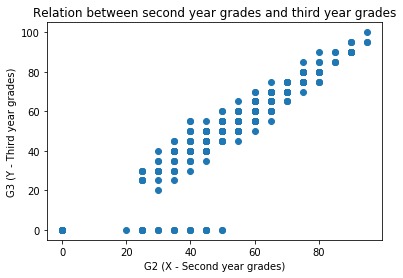

In [15]:
# DO NOT EDIT THIS CODE CELL
plt.scatter(X[:,1],y)
plt.title('Relation between second year grades and third year grades')
plt.xlabel('G2 (X - Second year grades)')
plt.ylabel('G3 (Y - Third year grades)')
plt.show()

##### Let us start implementing linear regression from scratch. Just follow code cells, see hints if required.

In [16]:

def predict(X, weights):
    '''
    weights   : array (2,1) w0 and w1
    X         : array (m,2) x0 (intercept=1) and x1
    
    Returns predicted y using hyothesis linear function defined by given weights
    '''
    ### START CODE HERE ###
    #Vectorized
    y_pred = X@weights
    
    ### END CODE HERE ###
    assert (y_pred.shape==(X.shape[0],)), 'Wrong implementation of predict function. Check carefully'
    
    return y_pred

In [17]:
def mean_squared_error(y_true, y_pred) : 
    '''
    y_true : (m,1)
    y_pred : (m,1)
    
    Return the mean squared error
    '''
    ### START CODE HERE ###
    m = y_true.shape[0]
    loss = y_pred - y_true
    loss = loss*loss
    loss = np.sum(loss)
    loss = (1/(2*m)) * loss
    ### END CODE HERE ###
    
    return loss

In [18]:
def gradient(X, y_true, y_pred):
    '''
    X      : array (m,2)
    y_true : array (m,1)
    y_pred : array (m,1)
    
    Returns a numpy array with gradients. Shape (2,1)
    '''
    # Initialize the gradient vector for w0 (intercept/bias) and w1 respectively
    grad = np.zeros(2,)
    #total sample sizw
    m = X.shape[0]
    
    ### START CODE HERE ###
    grad[0] = (1/m) * np.sum((y_pred - y_true))
    grad[1] = (1/m) * np.sum((y_pred - y_true) * X[:,1])
    
    ### END CODE HERE ###
    
    return grad

In [19]:
def gradient_descent(X, y, learning_rate=0.0000001, max_iterations=10000):
    '''
    X              : Array (m,2)
    y              : Array (m,1)
    learning_rate  : Learning rate
    max_iterations : Maximum iteratons
    
    Returns : weights vector (2,1)
            : losses (List)
    '''
    # Initialise weights vector of random values of size (2,1)
    weights = np.random.rand(2)
    # Initialize a list to record all the losses 
    losses  = []
    m = X.shape[0]
    ### START CODE HERE ###
    
    for i in range(max_iterations):
        
        y_predicted = predict(X, weights)
        losses.append(mean_squared_error(y, y_predicted))
        grad = gradient(X, y, y_predicted)
        weights[0] = weights[0] - learning_rate*grad[0]
        weights[1] = weights[1] - learning_rate*grad[1]

        
        
    
    ### END CODE HERE ###
    
    return weights, losses

##### Congratulations! You have implemented linear regression from scratch. Let's see this in action.

In [20]:
# Perform gradient descent
optimal_weights, losses = gradient_descent(X, y)

In [21]:
# DO NOT CHANGE THE FOLLOWING CODE CELLS
# Print final loss
print("Mean squared error:", losses[-1])

Mean squared error: 51.071871552085


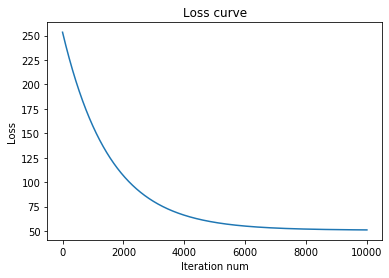

In [22]:
# Plot the loss curve
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [23]:
# Make predictions using trained weights
y_pred = predict(X, optimal_weights)

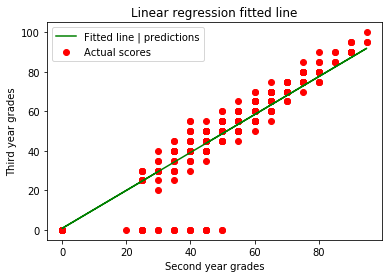

In [24]:
# Visualize the results by plotting it
plt.scatter(X[:,1], y, c='r', label='Actual scores')
plt.plot(X[:,1], y_pred, c='g', label='Fitted line | predictions')
plt.legend()
plt.title("Linear regression fitted line")
plt.xlabel("Second year grades")
plt.ylabel("Third year grades")
plt.show()